<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Details" data-toc-modified-id="Details-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Details</a></span></li><li><span><a href="#Interpretation-of-Shape-Parameter-k:" data-toc-modified-id="Interpretation-of-Shape-Parameter-k:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpretation of Shape Parameter k:</a></span></li><li><span><a href="#Mean,-Variance:" data-toc-modified-id="Mean,-Variance:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mean, Variance:</a></span></li><li><span><a href="#Example:-Leaving-a-Loyalty-Program" data-toc-modified-id="Example:-Leaving-a-Loyalty-Program-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Example: Leaving a Loyalty Program</a></span></li></ul></div>

# Weibull Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

In probability theory and statistics, the **Weibull distribution**, can be considered as a generalization of the exponential distribution. While exponential distribution describes the waiting time between continuously and independently event at a constant rate (events in a Poisson process), **Weibull distribution relaxes the constrain of constant rate by adding a shape parameter $k \in (0, + \infty)$ in exponential distribution.**

It can also be applied to describe the *'waiting time'* of before something happens, just like a exponential distribution:  
* the waiting time between two telephone call
* the life of the electronic component (the waiting time before the breakdown)

The difference is that the event like phone call or failure of an electronic component do not have to happen at constant rate as in exponential distribution. We will show that the waiting time decreases as time flies when $k \in (0, 1)$, increases when $k \in (1, + \infty)$, and the distribution degenerates to the exponential distribution when $k = 1$.  

### Details

A Weibull distribution is a continuous distribution on nonnegative real number ($x \in [0, +\infty)$), with PDF and CDF describe as below:  
  
**PDF:**  
The probability density function (PDF) of Weibull distribution with **scale parameter** $\beta >0$ and **shape parameter** $k >0$ is given by
  
$$
f(x;\beta, k) = \begin{cases} \frac{k}{ \beta } (\frac{x}{ \beta })^{k-1} e ^ {-(x / \beta) ^ k}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
When $k \in (0,1]$ the PDF is monotone decreasing, and the PDF has a peak as $k \in (1,+\infty)$: 
  
  
**CDF:**  
The cumulative distribution function (CDF) can be written in terms of:  
  
$$
F(x;\beta, k) = \begin{cases} 1 - e ^ {- (x/\beta)^k}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$
  
  
When $k \in (0,1]$ the CDF is a convex function, and the CDF shows a '*S* shape' with a inflection point when $k \in (1,+\infty)$.
  
**Scale parameter $\beta$:**
One of the parameter of the distribution is the scale parameter $\beta$, it can take value from $(0, +\infty)$.

**Shape parameter $k$:**
The other parameter of the distribution is the shape parameter $k$, it can take value from $(0, +\infty)$.
  
**Caveat: Weibull Distribution in *scipy.stats*:**  
Scipy.stats does not provide Weibull distribution alone, but a group of generalized Weibull distributions called *exponential Weibull distribution*. To get standard Weibull distribution, we need to take $a = 1$. The parameter $c$ in stats.exponweib is for shape parameter $k$ in our representation, and the parameter *scale* is for the scale parameter $\beta$ in our representation.

In [2]:
def weib_plot_pdf_cdf(β,k):
    wrv = st.exponweib(a = 1, c = k, scale = β)
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    
    xvals = np.linspace(0, 5, 100)
    ax[0].plot(xvals, wrv.pdf(xvals))
    ax[0].set_title("Probability Distribution Function")
    
    xvals = np.linspace(0, 5, 100)
    ax[1].plot(xvals, wrv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs_beta = FloatSlider(
    value=1, min=0.1, max=5,
    step=0.1, description="Scale $ β $",
    style={"description_width": "10%"},
    layout={"width": "80%"}
)

fs_k = FloatSlider(
    value=1, min=0.1, max=5,
    step=0.1, description="Shape $k$",
    style={"description_width": "10%"},
    layout={"width": "80%"}
)

output = interact(weib_plot_pdf_cdf, β=fs_beta, k=fs_k)

interactive(children=(FloatSlider(value=1.0, description='Scale $ β $', layout=Layout(width='80%'), max=5.0, m…

### Interpretation of Shape Parameter k:

**If the quantity $X$ is a "time-to-failure", the Weibull distribution gives a distribution for which the failure rate is proportional to a power of time**. The shape parameter, $k$, is that power plus one, and so this parameter can be interpreted directly as follows:

* **A value of $k <1$ indicates that the failure rate decreases over time (Lindy effect)**. This happens if there is significant "infant mortality", or defective items failing early and the failure rate decreasing over time as the defective items are weeded out of the population. Consider a loyalty program of a cafe or hotel chain. The longer a consumer becomes a member, the less likely the consumer is to end the loyalty program and choose another brand of cafe or hotel.
    
    
* **A value of $k = 1$ indicates that the failure rate is constant over time.** This might suggest random external events are causing mortality, or failure. The Weibull distribution reduces to an exponential distribution;  

$$
f(x;\beta) = \begin{cases} \frac{1}{ \beta } e ^ {-x / \beta}, &  x \geq 0 \\ \quad0, & \text{otherwise}  \end{cases}
$$  

    
    
* **A value of $K > 1$ indicates that the failure rate increases with time.** This happens if there is an "aging" process, or parts that are more likely to fail as time goes on. Consider a light bulb. The longer it is used, the more likely it is to break down.

### Mean, Variance:
**1. Mean**:  
$$
\mu = EX = \int _{-\infty }^{+\infty } x f(x; \lambda) dx = \int _{0}^{+\infty } x \big (\frac{k}{ \beta } \big) \big( \frac{x}{ \beta } \big)^{k-1} e ^ {-(x / \beta) ^ k} = \beta \ \Gamma \big( 1+\frac{1}{k} \big)
$$

**2. Variance**:  
$$
\sigma^2 = DX = E(X^2) - (EX)^2 = \beta^2 \ \bigg[ \Gamma \bigg(1 + \frac{2}{k}\bigg)- \bigg(\Gamma \bigg(1 + \frac{1}{k} \bigg) \bigg)^2 \bigg]
$$

### Example: Leaving a Loyalty Program

Consider a loyalty program of a cafe. The number of months people are in the loyalty program can be described by the Weibull distribution with scale parameter $\beta = 5$ and shape parameter $k = 0.5$.

In [4]:
# define the Weibull distribution
β = 3
k = 0.5
wrv = st.exponweib(a = 1, c = k, scale = β)

We can take a single draw from this distribution.

In [5]:
loyal_time = wrv.rvs()
print(loyal_time)

0.6616333260506227


We can check the mean of the distribution.

In [6]:
wrv.mean()

5.999999999999966

We can check the variance of the distribution.

In [7]:
wrv.var()

179.99999999774383

Or we could see what happens over many similar customers stay in the loyalty program for less or equals to 12 months (according to the law of large numbers, we should expect that the fraction of customers should obey the cumulative probability in range 12-).

In [8]:
cus_size = 10000
samples = wrv.rvs(cus_size)

print(f'Among {cus_size} customers, {np.sum(samples <= 12)} of them stay less or equals to 12 month.')
print(f'The frequency is {np.mean(samples <= 12)}.')
print(f'The probability calculates from CDF is {wrv.cdf(12)}.')

Among 10000 customers, 8654 of them stay less or equals to 12 month.
The frequency is 0.8654.
The probability calculates from CDF is 0.8646647167633873.


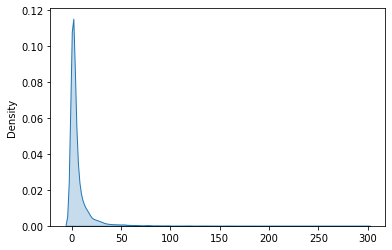

In [9]:
import seaborn as sns

sns.kdeplot(samples,shade=True)
plt.show()

**Note**: In creating this notebook, I referenced the "Distribution Explorer" material found at https://distribution-explorer.github.io/index.html, and wikipedia https://en.wikipedia.org/wiki/Weibull_distribution. I certainly encourage others to find additional information there.